Visualisation

#1. Charger les données

In [1]:
import pandas as pd

# Expression normalisée (post-QC)
X = pd.read_csv(r"C:\Users\klerv\Documents\6.M2_AIDA\UE3- AI_DeppLearning\Projet\Data\tcga_ucec_filtered_logCPM_scaled.csv.gz", index_col=0)

# Métadonnées cliniques
meta = pd.read_csv(r"C:\Users\klerv\Documents\6.M2_AIDA\UE3- AI_DeppLearning\Projet\Data\metadata_clinical_merged.csv.gz", index_col="sample_barcode")

# Alignement
X = X.loc[meta.index]

print(meta.columns.tolist())



['barcode', 'patient', 'sample', 'shortLetterCode', 'definition', 'sample_submitter_id', 'tumor_descriptor', 'sample_id', 'pathology_report_uuid', 'submitter_id', 'sample_type', 'specimen_type', 'days_to_collection', 'state.x', 'initial_weight', 'tissue_type', 'preservation_method', 'figo_stage.x', 'synchronous_malignancy.x', 'days_to_diagnosis.x', 'figo_staging_edition_year.x', 'treatments', 'tissue_or_organ_of_origin.x', 'age_at_diagnosis.x', 'primary_diagnosis.x', 'prior_malignancy.x', 'year_of_diagnosis.x', 'prior_treatment.x', 'diagnosis_is_primary_disease.x', 'method_of_diagnosis.x', 'morphology.x', 'residual_disease.x', 'classification_of_tumor.x', 'diagnosis_id.x', 'icd_10_code.x', 'site_of_resection_or_biopsy.x', 'tumor_grade.x', 'laterality.x', 'ajcc_pathologic_t.x', 'ajcc_pathologic_stage.x', 'ajcc_pathologic_n.x', 'ajcc_pathologic_m.x', 'ajcc_staging_system_edition.x', 'days_to_last_follow_up.x', 'follow_ups_disease_response.x', 'race.x', 'gender.x', 'ethnicity.x', 'vital_s

#2. Sélection des Highly Variable Genes (HVG)

In [2]:
import numpy as np

gene_var = X.var(axis=0)
hvg = gene_var.sort_values(ascending=False).head(5000).index
X_hvg = X[hvg]


#3. PCA

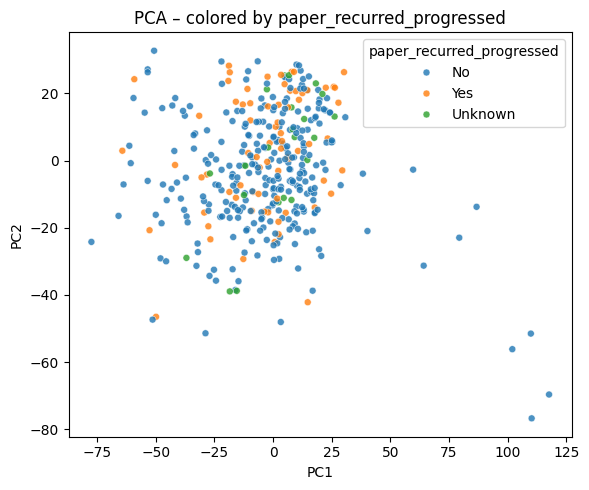

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_norm = X_hvg

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_norm)

pca_df = pd.DataFrame(
    X_pca,
    index=X_norm.index,
    columns=["PC1", "PC2"]
)

# ---- CHOISIR LA COLONNE POUR COLORER ----
color_col = "paper_tumor_grade" #"race.x" #"paper_histology" #"figo_stage.x",  

plot_df = pca_df.join(meta[color_col])

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=plot_df,
    x="PC1", y="PC2",
    hue=color_col,
    s=25, alpha=0.8
)
plt.title(f"PCA – colored by {color_col}")
plt.tight_layout()
plt.show()


#3. UMAP

c:\Users\klerv\Documents\Python\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


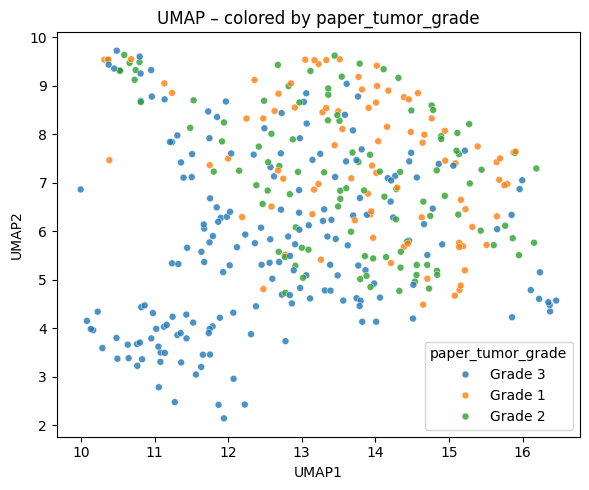

In [ ]:
import umap

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.3,
    random_state=42
)

X_umap = reducer.fit_transform(X_norm)

umap_df = pd.DataFrame(
    X_umap,
    index=X_norm.index,
    columns=["UMAP1", "UMAP2"]
)

# ---- CHOISIR LA COLONNE ----
color_col = "paper_tumor_grade"

plot_df = umap_df.join(meta[color_col])

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=plot_df,
    x="UMAP1", y="UMAP2",
    hue=color_col,
    s=25, alpha=0.8
)
plt.title(f"UMAP – colored by {color_col}")
plt.tight_layout()
plt.show()


#3. t-SNE

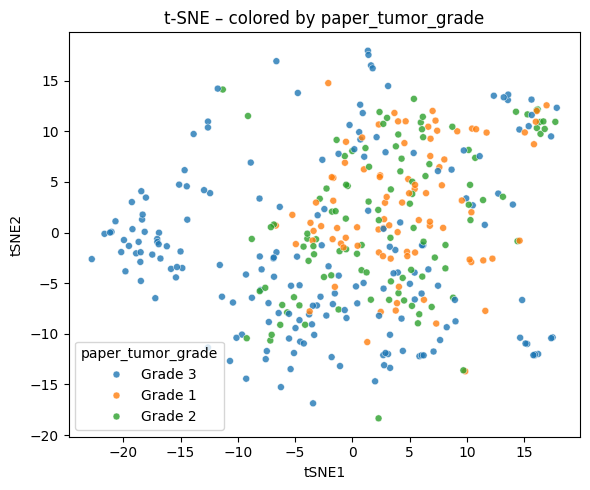

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
)

X_tsne = tsne.fit_transform(X_norm)

tsne_df = pd.DataFrame(
    X_tsne,
    index=X_norm.index,
    columns=["tSNE1", "tSNE2"]
)

# ---- CHOISIR LA COLONNE ----
color_col = "paper_tumor_grade"

plot_df = tsne_df.join(meta[color_col])

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=plot_df,
    x="tSNE1", y="tSNE2",
    hue=color_col,
    s=25, alpha=0.8
)
plt.title(f"t-SNE – colored by {color_col}")
plt.tight_layout()
plt.show()
